# <center> Практическая работа №11.
### <center>Регрессионный анализ: парная линейная регрессия

In [1]:
#Загрузка основных модулей:
import numpy as np
import math
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
from sklearn.linear_model import LinearRegression

**Задание 1.** Осуществите статистическую обработку двумерной выборки по следующему плану.
1) Постройте диаграмму рассеивания, найдите коэффициент корреляции Пирсона; проверьте гипотезу о его значимости (выборки в файле .«Данные 11_1» подобраны таким образом, что она должна подтвердиться).

Выборочное значение коэффициента корреляции Пирсона: -0.87033053694891


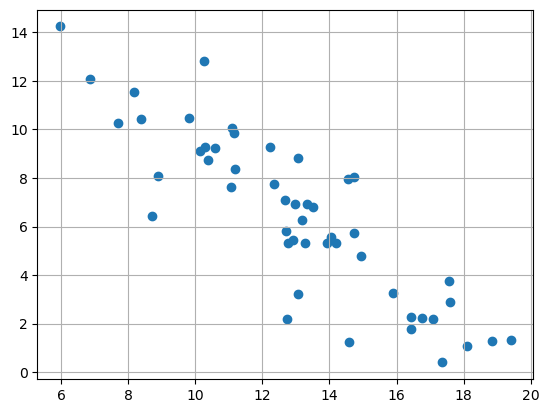

In [2]:
# Загрузка данных из Excel файла
data = pd.read_excel('Data_11_1.xlsx', header=0)

# Создаем пустой список для хранения обработанных данных
k = []

# Указываем названия колонок, из которых будут извлекаться данные
Name = ['Вариант 9', 'Unnamed: 18']

# Обрабатываем каждую колонку из указанных
for i in range(2):
    # Извлекаем колонку из данных и создаем DataFrame
    r = pd.DataFrame(data[Name[i]])
    
    # Создаем список для хранения численных значений из текущей колонки
    l = []
    for j, row in r.itertuples():  # Проходим по строкам DataFrame
        if row == "X" or row == "Y":  
            # Пропускаем строки, где значения равны "X" или "Y"
            continue
        if type(row) == str:  
            # Если значение строковое, обрабатываем его
            l.append(float(row.replace("–", "-").replace(",", ".")))  # Заменяем длинное тире и запятые на точки, приводим к float
        else:
            # Если значение уже числовое, добавляем его в список
            l.append(row)
    
    # Добавляем обработанный список чисел в общий список k
    k.append(l)

# Разделяем обработанные данные на два отдельных списка: x и y
x, y = k[0], k[1]

# Объединяем x и y в массив с двумя колонками (каждая строка — пара значений x и y)
xy = np.append(x, y).reshape(2, 50).T  # Преобразуем в двумерный массив с 50 строками и 2 столбцами

# Создаем DataFrame из массива xy
df_xy = pd.DataFrame(xy)

r = np.corrcoef(x,y)[0, 1]
print(f"Выборочное значение коэффициента корреляции Пирсона: {r}")

# Строим график рассеяния (scatter plot) для данных x и y
plt.scatter(x, y)  # Наносим точки на график
plt.grid()  # Включаем сетку на графике
plt.show()  # Отображаем график

2) Составьте уравнения линейной регрессии $Y$ на $х$ и $X$ на $у$ (без использования функций языка программирования Python, непосредственно находящих регрессионные прямые).

Воспользуемся следующими формулами:
<center> $\widetilde{\beta_1} = \frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sum(x_i - \overline{x})^2} = \frac{Q_{xy}}{Q_{xy}}$
   <center> $ \widetilde{\beta_0} =\overline{y} - \widetilde{\beta_1}\overline{x}$

In [3]:
def Q_XY(x, y):
    summ = 0
    Mx,My=np.mean(x),np.mean(y)
    for i in range(len(x)):
        summ+=(x[i]-Mx)*(y[i]-My)
    return summ

def Q_X(x):
    summ = 0 
    Mx=np.mean(x)
    for i in range(len(x)):
        summ+=(x[i]-Mx)**2
    return summ

def Q_Y(y):
    summ = 0 
    My=np.mean(y)
    for i in range(len(y)):
        summ+=(y[i]-My)**2
    return summ

Mx,My=np.mean(x),np.mean(y)

q_xy = Q_XY(x,y)
q_x = Q_X(x)

betta_1 = q_xy/q_x
betta_0 = My - betta_1*Mx
print(f"Уравнение регрессии Y на x: Y = {betta_0}  {betta_1} * x")

Уравнение регрессии Y на x: Y = 18.584386719121582  -0.9357807730176838 * x


In [4]:
q_y = Q_Y(y)

betta_1 = q_xy/q_y
betta_0 = Mx - betta_1*My
print(f"Уравнение регрессии X на y: X = {betta_0}  {betta_1} * y")

Уравнение регрессии X на y: X = 18.18916634088187  -0.8094580113065263 * y


In [5]:
#Проверка с помощью готовых формул
b_, a_ = np.polyfit(x, y, 1)
b_1, a_1 = np.polyfit(y, x, 1)
print(f"Проверка: Y = {a_} {b_} * x")
print(f"Проверка: X = {a_1} {b_1} * y")

Проверка: Y = 18.584386719121586 -0.935780773017684 * x
Проверка: X = 18.18916634088187 -0.809458011306525 * y


3) Нанесите графики выборочных прямых на диаграмму рассеивания.

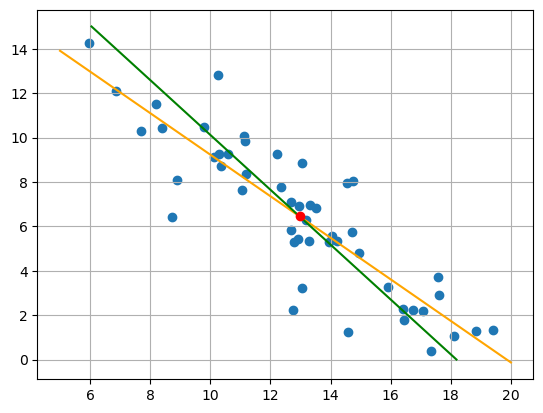

In [6]:
x = np.linspace(5,20,50)
Y = 18.58438671912158 -0.9357807730176834 * x
plt.plot(x,Y,'orange')
y = np.linspace(0,15,50)
X = 18.18916634088187 -0.8094580113065267 * y
plt.plot(X,y,'green')
# Строим график рассеяния  для данных x и y
x, y = k[0], k[1]
xy = np.append(x, y).reshape(2, 50).T
plt.scatter(x, y)  # Наносим точки на график
plt.plot(np.mean(x),np.mean(y),'ro',label="Центр рассеивания")
plt.grid() 
plt.show()  

**Вывод:** На графике видно, что линии регрессии $ Y $ на $ x$ и $X $ на $ y $ пересекаются в центре рассеивания точек. Также заметно, что эти уравнения регрессии хорошо описывают взаимосвязь между случайными величинами $ Y $ и $ x $, а также $ X $ и $ y $, имея вид нисходящих прямых. Это подтверждается отрицательным значением выборочного коэффициента корреляции.

**Задание 2.**  В предположении, что ошибки наблюдений не коррелированы и имеют нормальное распределение $N (0,\sigma)$, оцените качество аппроксимации результатов наблюдения уравнением линейной регрессии $Y$ на $х$:

1) вычислите оценку $s^2$ для дисперсии ошибок наблюдений $\sigma^2$;

<center> $s^2 = \frac{\sum e_i^2}{n - 2} = \frac{1}{n-2}\sum\left[y_i - \left(\widetilde{\beta_0}+\widetilde{\beta_1}x_i\right)\right] ^2 = \frac{Q_e}{n-2}$

In [16]:
betta_1 = q_xy/q_x
betta_0 = My - betta_1*Mx
Mx,My=np.mean(x),np.mean(y)

def Q_e(x,y):
    summ = 0
    print(x,y)
    for i in range(len(x)):
        summ+=(y[i]-(betta_0+betta_1*x[i]))**2
    return summ

q_e = Q_e(x,y)
n = len(x)
s_2 = q_e/(n-2)

print(f"оценка $s^2$ для дисперсии ошибок наблюдений $\sigma^2$ = {s_2}")

[13.27, 18.09, 11.19, 14.74, 14.05, 12.96, 12.22, 10.6, 17.56, 17.35, 13.94, 11.16, 12.92, 8.72, 9.8, 7.71, 12.7, 16.75, 13.05, 12.77, 10.29, 16.44, 13.17, 14.72, 6.86, 11.07, 14.55, 14.2, 11.11, 5.97, 14.59, 12.67, 13.52, 17.6, 17.08, 12.35, 15.9, 13.33, 8.88, 8.18, 8.38, 10.37, 14.93, 16.42, 19.41, 10.25, 12.75, 13.06, 18.84, 10.13] [5.32, 1.07, 8.36, 8.05, 5.55, 6.91, 9.27, 9.25, 3.74, 0.4, 5.31, 9.86, 5.45, 6.43, 10.48, 10.28, 5.83, 2.25, 8.84, 5.31, 9.27, 1.78, 6.27, 5.74, 12.08, 7.62, 7.96, 5.33, 10.06, 14.24, 1.25, 7.1, 6.82, 2.9, 2.2, 7.76, 3.25, 6.94, 8.1, 11.53, 10.44, 8.72, 4.78, 2.26, 1.32, 12.83, 2.21, 3.21, 1.27, 9.1]
оценка $s^2$ для дисперсии ошибок наблюдений $\sigma^2$ = 2.9175546307875506


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7344/598414590.py:16: SyntaxWarning: invalid escape sequence '\s'
  print(f"оценка $s^2$ для дисперсии ошибок наблюдений $\sigma^2$ = {s_2}")


2) найдите коэффициент детерминации $R^2$ ;
$$R^2 = 1 - \frac{Q_e}{Q_y}$$

In [8]:
R_2 =1-q_e/Q_Y(y)
print('коэффициент детерминации $R^2$',R_2)

коэффициент детерминации $R^2$ 0.7574752435457786


Выполню проверку: $(-0.87)^2 = 0.7569$

3) постройте доверительные интервалы для параметров регрессии;

<center> $\widetilde{\beta}_0 \pm t_{1-\alpha/2}(n-2)s\sqrt{\frac{\sum x_i^2}{nQ_x}}$
    <center> $\widetilde{\beta}_1 \pm t_{1-\alpha/2}(n-2)s\sqrt{\frac{1}{Q_x}}$

In [9]:
def Q_X_2(x):
    summ = 0
    for i in range(len(x)):
        summ+=x[i]**2
    return summ

alpha = 0.9
s = np.sqrt(s_2)
q_x_2 = Q_X_2(x)
bound_left_0 = betta_0 - sts.t.ppf(1-alpha/2,n-2)*s*np.sqrt(q_x_2/(q_x*n))
bound_right_0 = betta_0 + sts.t.ppf(1-alpha/2,n-2)*s*np.sqrt(q_x_2/(q_x*n))

bound_left_1 = betta_1 - sts.t.ppf(1-alpha/2,n-2)*s*np.sqrt(1/(q_x))
bound_right_1 = betta_1 + sts.t.ppf(1-alpha/2,n-2)*s*np.sqrt(1/(q_x))

print('Доверительные интервалы:')
print(f"({bound_left_0}<betta_0 <{bound_right_0})")
print(f"({bound_left_1}<betta_1 <{bound_right_1})")

Доверительные интервалы:
(18.45548523703116<betta_0 <18.713288201212006)
(-0.9454356521779017<betta_1 <-0.9261258938574659)


4) постройте доверительный интервал для дисперсии ошибок наблюдений $\sigma^2$ ; 
<center> $\frac{(n-2)s^2}{\chi^2 _ {1-\alpha/2}(n-2)} < \sigma^2 < \frac{(n-2)s^2}{\chi^2 _ {\alpha/2}(n-2)}$

In [10]:
bound_left_s = (n-2)*s_2/(sts.chi2.ppf(1-alpha/2,n-2))
bound_right_s = (n-2)*s_2/(sts.chi2.ppf(alpha/2,n-2))

print(f"({bound_left_s}<sigma^2 <{bound_right_s})")

(2.8835071007297555<sigma^2 <3.0362023725917453)


5) постройте доверительные интервалы для среднего значения $Y$ при $x=x_0$ и визуализируйте их (на рисунок с диаграммой рассеивания и регрессионными прямыми нанесите графики зависимости левой и правой границ доверительных интервалов от значения $x=x_0$ ).
<center> $\widetilde{y}_0 \pm t_{1-\alpha/2}(n-2)s\sqrt{\frac{1}{n}+\frac{(x-\overline{x_0})^2}{Q_x}}$

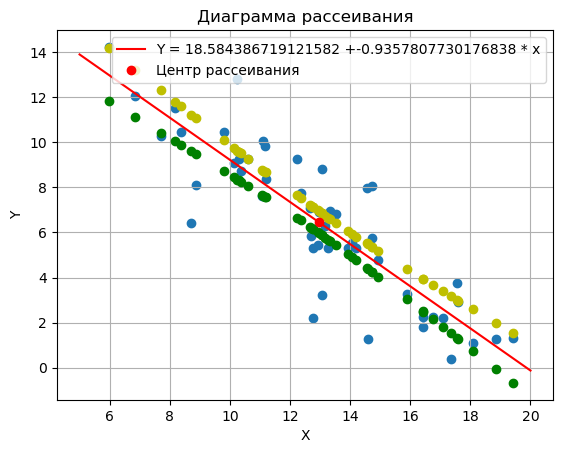

In [11]:
low_res=[]
t_ = sts.t.ppf(0.975, n - 2)
high_res=[]
for i in range(0, len(x)):
    x0 = x[i]
    y0 = betta_0 + betta_1 * x0
    c_y01 = y0 - t_ * np.sqrt(s_2 *(1 / n + ((x0 - np.mean(x))**2 / Q_X(x))))
    plt.plot(x0,c_y01,'go',lw=0.1)
    c_y02 = y0 + t_ * np.sqrt(s_2 *(1 / n + ((x0 - np.mean(x))**2 / Q_X(x))))
    plt.plot(x0,c_y02,'yo',lw=0.1)
x1 = np.linspace(5,20,100)
plt.plot(x1,betta_0 + betta_1* x1, color = 'r', label = f'Y = {betta_0} +{betta_1} * x')
plt.plot(np.mean(x),np.mean(y),'ro',label="Центр рассеивания")
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма рассеивания')
plt.legend()
plt.grid(True) 

6) проверьте статистическую значимость линейной регрессии $Y$ на $x$ на уровне значимости 0,05.

$H_0: \beta _1 = 0 \; \;\; H_1: \beta _1 \neq 0$

In [12]:
F=betta_1**2*q_x/s_2
f=sts.f(1,n-2)
pvalue=2*min(f.cdf(F),1-f.cdf(F))
if pvalue < betta_0:
    print("Отклоняем H0, Н1 принимаем, делвем вывод, что линейная регрессия значима")
else:
    print("Принимаем H0,следовательно линейная регрессия не значима.")

Отклоняем H0, Н1 принимаем, делвем вывод, что линейная регрессия значима


**Задание 3.** Для изучения вопроса об адекватности построенной модели проанализируйте остатки (выборку значений случайных ошибок наблюдений - разностей между наблюдаемыми значениями у и вычисленными по регрессионному уравнению $\widetilde{y}_i i=1,2, ...,n$ ). Постройте график зависимости остатков от $x_j$, постройте гистограмму выборки
значений случайных ошибок наблюдений, проверьте гипотезу о распределении ошибок наблюдений по нормальному закону.

Принимаем гипотезу о том, что ошибки распределены нормально при alpha<0.1291058212518692
Значение p-value: 0.1291058212518692
Математическое ожидание случайных ошибок: m = 1.638689184346731e-15


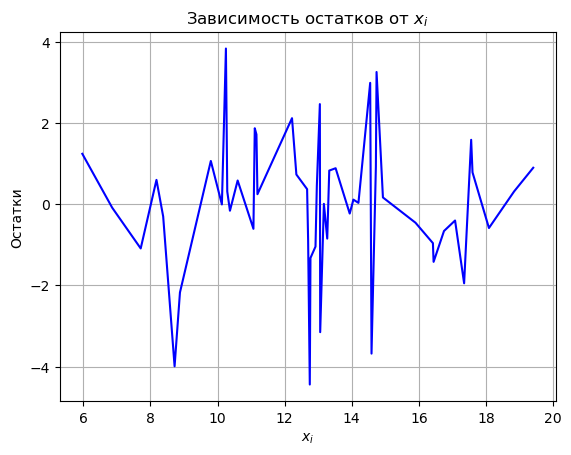

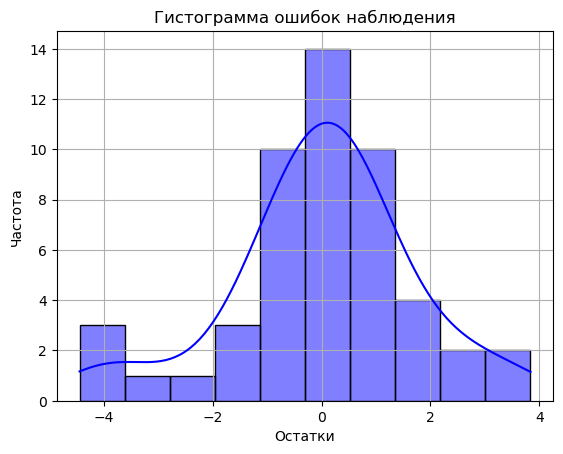

In [13]:
# Инициализация списка остатков
residuals = []

# Лямбда-функция для вычисления прогнозного значения Y по регрессионному уравнению
Yx = lambda x: betta_0 + betta_1 * x

# Вычисление остатков как разности между наблюдаемыми значениями Y и прогнозными
for i in range(n):
    residuals.append([x[i], y[i] - Yx(x[i])])  # [значение x, остаток]

# Сортировка остатков по x для построения графика зависимости остатков от x
residuals = sorted(residuals, key=lambda i: i[0])

# Построение графика зависимости остатков от x
fig = plt.figure()
x_values, residual_values = [], []  # Списки для значений x и остатков
for i in range(n):
    x_values.append(residuals[i][0])  # Значение x
    residual_values.append(residuals[i][1])  # Остаток
plt.plot(x_values, residual_values, color="b")  # График остатков
plt.title("Зависимость остатков от $x_i$")
plt.xlabel("$x_i$")
plt.ylabel("Остатки")
plt.grid()

# Построение гистограммы остатков
plt.figure()
sns.histplot(residual_values, color="b", kde=True)  # Гистограмма остатков
plt.title("Гистограмма ошибок наблюдения")
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.grid()

# Проверка гипотезы о нормальном распределении остатков с помощью критерия Шапиро-Уилка
shapiro_test = sts.shapiro(residual_values)  # Тест Шапиро-Уилка
alpha = 0.05  # Уровень значимости
print(f"Принимаем гипотезу о том, что ошибки распределены нормально при alpha<{shapiro_test.pvalue}")
print(f"Значение p-value: {shapiro_test.pvalue}")

# Вычисление математического ожидания остатков
mean_residual = np.mean(residual_values)
print(f"Математическое ожидание случайных ошибок: m = {mean_residual}")

**Задание 4.** Сгруппируйте данные по х и проверьте адекватность линейной регрессии $Y$ на $х$ на уровне значимости $0,05$.

Данные группировки по $х$ выведите на печать.

Границы интервалов для x: [ 5.97   7.314  8.658 10.002 11.346 12.69  14.034 15.378 16.722 18.066
 19.41 ]
Количество элементов в каждом интервале: [ 1.  3.  3.  9.  3. 12.  7.  3.  5.  3.]
Сумма наблюдаемых значений Y в каждом интервале: [12.08 32.25 25.01 85.07 24.13 68.42 38.66  7.29 11.49  3.66]
Сумма прогнозных значений Y в каждом интервале: [12.16493062 33.0417608  30.11276698 77.26544353 20.90468417 75.68331573
 34.84693996 10.12448967 12.12662165  3.03127141]
Среднее значение Y в каждом интервале: [12.08       10.75        8.33666667  9.45222222  8.04333333  5.70166667
  5.52285714  2.43        2.298       1.22      ]


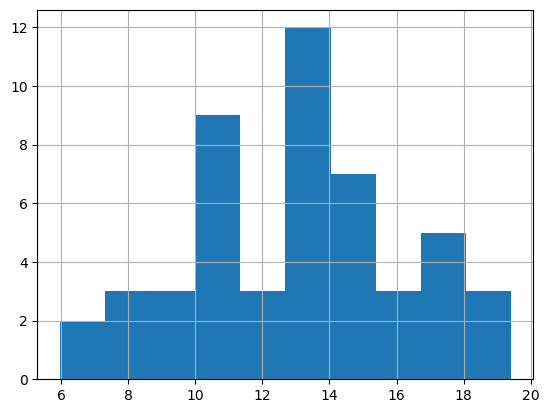

In [14]:
# Построим гистограмму для данных x
hist_data = plt.hist(x)  # hist_data[1] содержит границы интервалов
plt.grid()

# Инициализация переменных для расчета
interval_counts = []  # Количество элементов в каждом интервале
observed_sum = []  # Сумма наблюдаемых значений Y в каждом интервале
predicted_sum = []  # Сумма прогнозных значений Y (по регрессии) в каждом интервале
current_count = 0  # Счетчик элементов в интервале
current_observed_sum = 0  # Сумма наблюдаемых значений Y в текущем интервале
current_predicted_sum = 0  # Сумма прогнозных значений Y в текущем интервале

# Получение интервалов из гистограммы
interval_bounds = np.array(hist_data[1])  # Границы интервалов
num_intervals = len(interval_bounds)  # Количество интервалов

# Группировка данных по интервалам
for i in range(0, num_intervals - 1):  # Перебор всех интервалов
    for j in range(0, len(x)):  # Проход по всем элементам x
        if interval_bounds[i] < x[j] <= interval_bounds[i + 1]:  # Проверка попадания x[j] в текущий интервал
            current_count += 1  # Увеличиваем счетчик элементов в интервале
            current_observed_sum += y[j]  # Суммируем наблюдаемые значения Y
            current_predicted_sum += betta_0 + betta_1 * x[j]  # Суммируем прогнозные значения Y по формуле линейной регрессии
    observed_sum = np.append(observed_sum, current_observed_sum)  # Сохраняем сумму наблюдаемых Y для текущего интервала
    predicted_sum = np.append(predicted_sum, current_predicted_sum)  # Сохраняем сумму прогнозных Y для текущего интервала
    interval_counts = np.append(interval_counts, current_count)  # Сохраняем количество элементов в текущем интервале
    # Сброс переменных для следующего интервала
    current_count = 0
    current_observed_sum = 0
    current_predicted_sum = 0

# Расчет среднего значения Y в каждом интервале
interval_means = []
for i in range(0, num_intervals - 1):
    interval_means = np.append(interval_means, observed_sum[i] / interval_counts[i] if interval_counts[i] != 0 else 0)  # Проверка на деление на ноль

# Вывод результатов
print(f'Границы интервалов для x: {interval_bounds}')
print(f'Количество элементов в каждом интервале: {interval_counts}')
print(f'Сумма наблюдаемых значений Y в каждом интервале: {observed_sum}')
print(f'Сумма прогнозных значений Y в каждом интервале: {predicted_sum}')
print(f'Среднее значение Y в каждом интервале: {interval_means}')

In [15]:
# Инициализация переменных для расчета суммы квадратов отклонений
current_error_sum = 0  # Сумма квадратов отклонений для текущего интервала
interval_error_sums = []  # Список для хранения сумм квадратов отклонений по интервалам

# Расчет суммы квадратов чистой ошибки для каждого интервала
for i in range(0, num_intervals - 1):  # Перебор интервалов
    for j in range(0, len(x)):  # Перебор всех значений x
        if interval_bounds[i] < x[j] <= interval_bounds[i + 1]:  # Проверка попадания x[j] в интервал
            current_error_sum += (y[j] - interval_means[i]) ** 2  # Квадрат отклонения наблюдаемого y[j] от среднего в интервале
    interval_error_sums = np.append(interval_error_sums, current_error_sum)  # Сохранение суммы для текущего интервала
    current_error_sum = 0  # Сброс суммы для следующего интервала

# Вывод результатов
print(f'Сумма квадратов чистой ошибки для каждого интервала: {interval_error_sums}')

# Сумма квадратов отклонений внутри интервалов
Qp = np.sum(interval_error_sums)
print('Сумма квадратов чистой ошибки (Q_p):', Qp)

# Расчет остаточной суммы квадратов
Qn = q_e - Qp
print('Остаточная сумма квадратов (Q_n):', Qn)

# Расчет статистики Фишера
f_statistic = (Qn / (num_intervals - 2)) / (Qp / (n - num_intervals - 1))
print('Статистика Фишера:', f_statistic)

# Критическое значение для уровня значимости alpha
alpha = 0.05
from scipy.stats import f
critical_value = f.ppf(1 - alpha, num_intervals - 2, n - num_intervals - 1)
print('Критическое значение статистики Фишера:', critical_value)

Сумма квадратов чистой ошибки для каждого интервала: [ 0.          0.9254      8.28526667 17.22935556  2.47486667 33.34876667
 31.22034286  1.1238      6.05608     0.035     ]
Сумма квадратов чистой ошибки (Q_p): 100.6988784126984
Остаточная сумма квадратов (Q_n): 39.34374386510402
Статистика Фишера: 1.649651240124572
Критическое значение статистики Фишера: 2.1375280906236744


Гипотезу об адекватности линейной результатам наблюдений принимается и остаточную дисперсию можно использо вать в качестве оценки дисперсии.